# <h1 style="text-align:center;">PlantGrowth R Dataset Analysis</h1>  

---

![image](img/plant_growth.webp)

The Plant Growth dataset, originally presented in Dobson, A. J. (1983) *An Introduction to Statistical Modelling* (London: Chapman and Hall), consists of dried plant weight measurements divided into three groups, each with 10 observations. The first group, labeled ctrl (control), represents the yield of plants grown under normal conditions and serves as the baseline or “before” sample. The second and third groups, labeled trt1 and trt2 (treatment 1 and treatment 2), represent the yields of plants subjected to two distinct treatments, which can be considered “after” samples.

<p style="text-align:center;">STUDY PURPOSE</p>
 
This dataset serves as a foundation for evaluating the impact of experimental treatments on plant growth. In this study, my primary objective is to determine whether the differences between the groups are statistically significant and to investigate whether treatment 1 is more effective than treatment 2, or vice versa. To achieve this, I will conduct a series of statistical analyses on the dried weights of the plants, using methods such as t-tests and analysis of variance (ANOVA). These methods will allow me to assess the relative effectiveness of the treatments.

<p style="text-align:center;">PRELIMINARY LIBRARIES IMPORT</p>  

The labraries that we are going to utilise for the present study will be the followings:

1. **math**:
   - The `math` library provides a set of mathematical functions such as logarithms, square roots, trigonometric functions, and constants (e.g., π). It's essential for carrying out basic mathematical operations, expecially for statistical calculations, and including any other type numerical analyses.

2. **random**:
   - The `random` library allows for random selections, which is necessary when dealing with sampling methods, such as simulating datasets, shuffling data, or generating random variables. It will be helpful for tasks like creating random samples from distributions or testing hypothesis.

3. **csv**:
   - The `csv` module is lightweight, efficient, and suitable for most CSV-related tasks, though for more complex cases (e.g., larger datasets), pandas may be a more powerful alternative.

4. **numpy**:
   - `numpy` is a core library for numerical computing in Python. It provides support for arrays and matrices, along with a vast range of mathematical functions for numerical operations. `numpy` is crucial for generating random data, performing array manipulations, and applying advanced mathematical functions—particularly when working with large datasets and statistical distributions, such as the normal distribution.
   
5. **matplotlib,pyplot**:
   - `matplotlib.pyplot` is a plotting library used to create static, animated, and interactive visualizations in Python. It is essential for graphing data distributions,  such as visualizing the normal distribution or plotting results from hypothesis tests like the t-test or ANOVA. Visualizations are key to interpreting and presenting data clearly.

6. **scipy.stats**:
   - `scipy.stats` is a submodule of the `scipy` library that provides a comprehensive range of statistical functions. It includes tools for hypothesis testing, probability distributions, and statistical tests, such as the t-test and ANOVA. This library is vital for performing rigorous statistical analysis and hypothesis testing in the assignment.

7. **statsmodels**:
   - `statsmodels` is a library for statistical modeling, which includes tools for performing regression analysis, hypothesis testing, and statistical inference. It's useful for more advanced statistical models and tests that go beyond basic functions. This library will be beneficial when applying more complex statistical methods, like ANOVA or regression models.

8. **pandas**:
   - `pandas` is a powerful library for data manipulation and analysis, offering data structures like DataFrames and Series for handling structured data efficiently. It provides functions to clean, transform, and explore datasets, making it easier to preprocess data for statistical analysis or machine learning tasks. The library integrates well with other libraries like statsmodels and numpy, serving as a foundation for managing data in preparation for more advanced analyses.  

9. **seaborn**:
   - `seaborn` is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies complex visualizations like heatmaps, violin plots, and pair plots, making it ideal for exploring and presenting data. It integrates well with pandas for handling DataFrames and offers built-in themes and color palettes to enhance the visual appeal of plots.

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html#module-math
import math

# Random selections.
# https://docs.python.org/3/library/random.html#module-random
import random

# CSV format data reading 
import csv

# Numerical structures and operations.
# https://numpy.org/devdocs/reference/index.html#numpy-reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

# Mathematical functions.
import math

# Data manipulation.
import pandas as pd

# Statistical plots.
import seaborn as sns

### Data Presentation

The **PlantGrowth R Dataset** was downloaded in CSV format and consists of 30 cases with 2 variables:

`weight`: A numeric variable representing the weights of the plants.
`group`: A categorical variable that divides the data into three groups: `ctrl`, `trt1`, and `trt2`.

In [2]:
# Open the CSF file.
with open('data/plant_growth_r.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


['rownames', 'weight', 'group']
['1', '4.17', 'ctrl']
['2', '5.58', 'ctrl']
['3', '5.18', 'ctrl']
['4', '6.11', 'ctrl']
['5', '4.5', 'ctrl']
['6', '4.61', 'ctrl']
['7', '5.17', 'ctrl']
['8', '4.53', 'ctrl']
['9', '5.33', 'ctrl']
['10', '5.14', 'ctrl']
['11', '4.81', 'trt1']
['12', '4.17', 'trt1']
['13', '4.41', 'trt1']
['14', '3.59', 'trt1']
['15', '5.87', 'trt1']
['16', '3.83', 'trt1']
['17', '6.03', 'trt1']
['18', '4.89', 'trt1']
['19', '4.32', 'trt1']
['20', '4.69', 'trt1']
['21', '6.31', 'trt2']
['22', '5.12', 'trt2']
['23', '5.54', 'trt2']
['24', '5.5', 'trt2']
['25', '5.37', 'trt2']
['26', '5.29', 'trt2']
['27', '4.92', 'trt2']
['28', '6.15', 'trt2']
['29', '5.8', 'trt2']
['30', '5.26', 'trt2']


To better understand the data and facilitate value manipulation, we will create a DataFrame named `group_df`. 

In [3]:
# Create a DataFrame.
group_df = pd.read_csv('/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/applied_statistics_assessment/data/plant_growth_r.csv')

# Eliminate the 'rownames' column.
group_df = group_df.drop(columns=['rownames'])

# Show.
group_df

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [4]:
# Show basic statistics for numeric columns.
group_df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


Once the DataFrame is created and we have given a general overview of the information we are examining, the data will be divided into three groups: the "before" yield weights and the two "after" yield weights.

In [5]:
# Forming three groups
weight_baseline = group_df['weight'][:10]
weight_trt1 = group_df['weight'][10:20]
weight_trt2 = group_df['weight'][20:30]

# Single group mean calculation.
mean_baseline = weight_baseline.mean()
mean_trt1 = weight_trt1.mean()
mean_trt2 = weight_trt2.mean()

print("Baseline mean:", mean_baseline)
print("Treatment 1 mean:", mean_trt1)
print("Treatment 2 mean:", mean_trt2)

Baseline mean: 5.031999999999999
Treatment 1 mean: 4.661
Treatment 2 mean: 5.526


From these means, it appears that the average yield weight for Treatment 1 is lower than the baseline, while Treatment 2 has a higher average yield weight compared to the baseline. While manually computing the means provides a snapshot of the differences, it does not tell us whether these differences are statistically significant or if they could have occurred by random chance.  

=> Means alone do not consider the variability (spread) of data within each group. Even if the means differ, overlapping variances might indicate no significant difference.

<p style="text-align:center;">PAIRING GROUPS</p>  

**To determine whether the differences between the groups are statistically significant, it is necessary to analyze their variances. A t-test provides an objective mathematical approach to achieve this goal. For this purpose, we will create three pairs of groups: one comparing Treatment 1, another comparing Treatment 2, and a third combining Treatments 1 and 2. We will then verify the assumptions of normality and independence for the paired samples to ensure the validity of the tests performed.**


### Assumptions

To assess the validity of the t-test, it is necessary to verify that the differences between the paired observations are approximately normally distributed and that the three pairs of variables, `weight_baseline`-`weight_trt1`, `weight_baseline`-`weight_trt2` and `weight_trt1`-`weight_trt2`, are independent of each other.

**ASSUMPTION NO1: Normally distributed data**  

To check if the difference between the paired observations is approximately normally distributed, we can again plot the values as histograms and create an x range for the probability density function to see if its curve is bell shaped and visually ressemble.

In [6]:
# Difference between the paired variables.
first_treatment = np.array(weight_baseline) - np.array(weight_trt1)
second_treatment = np.array(weight_baseline) - np.array(weight_trt2)
paired_treatments = first_treatment - second_treatment

# Show results.
first_treatment, second_treatment, paired_treatments


(array([-0.64,  1.41,  0.77,  2.52, -1.37,  0.78, -0.86, -0.36,  1.01,
         0.45]),
 array([-2.14,  0.46, -0.36,  0.61, -0.87, -0.68,  0.25, -1.62, -0.47,
        -0.12]),
 array([ 1.5 ,  0.95,  1.13,  1.91, -0.5 ,  1.46, -1.11,  1.26,  1.48,
         0.57]))

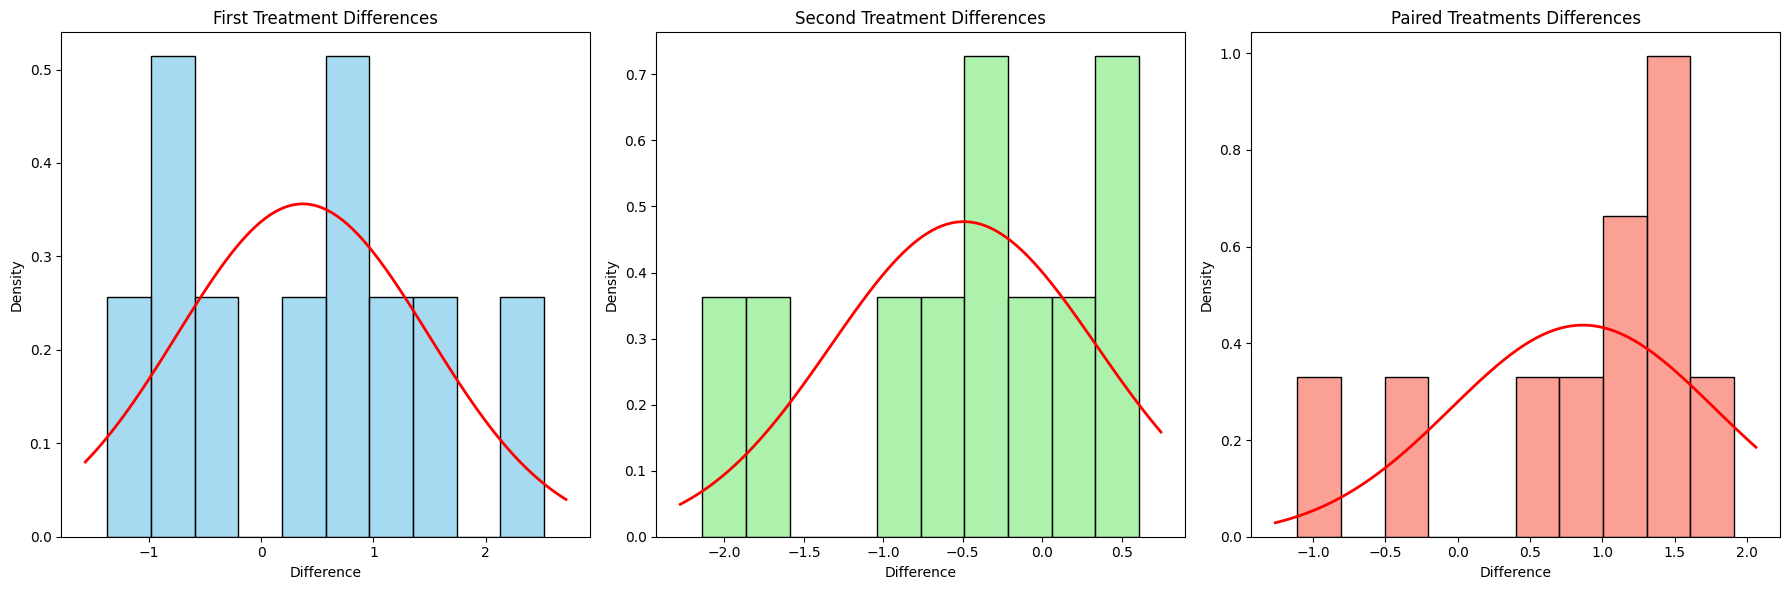

In [8]:
# Importing norm module from Scipy stats to create a normal distribution.
from scipy.stats import norm

# Create subplots with space for three plots.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first histogram.
sns.histplot(first_treatment, kde=False, ax=axes[0], color='skyblue', bins=10, stat="density")
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(first_treatment), np.std(first_treatment))
axes[0].plot(x, p, 'r-', lw=2)
axes[0].set_title('First Treatment Differences')
axes[0].set_xlabel('Difference')
axes[0].set_ylabel('Density')

# Plot the second histogram.
sns.histplot(second_treatment, kde=False, ax=axes[1], color='lightgreen', bins=10, stat="density")
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(second_treatment), np.std(second_treatment))
axes[1].plot(x, p, 'r-', lw=2)
axes[1].set_title('Second Treatment Differences')
axes[1].set_xlabel('Difference')
axes[1].set_ylabel('Density')

# Plot the third histogram for paired_treatments.
sns.histplot(paired_treatments, kde=False, ax=axes[2], color='salmon', bins=10, stat="density")
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(paired_treatments), np.std(paired_treatments))
axes[2].plot(x, p, 'r-', lw=2)
axes[2].set_title('Paired Treatments Differences')
axes[2].set_xlabel('Difference')
axes[2].set_ylabel('Density')

# Show plots.
plt.tight_layout()
plt.show()

The red line represents the probability density function (PDF) of a normal distribution fitted to the data. The norm.pdf function was used to calculate the normal distribution based on the mean and standard deviation of the differences, and its resulting plot was scaled to align with the histogram's scale, determined by the number of bins. However, all three histograms deviate from normality, appearing bimodal, skewed, or heavy-tailed. This deviation may be attributed to the random nature of the sample collections. 

As a matter of fact, a more reliable method to check whether a dataset follow a normal distribution or not is the [Shapiro-Wilk Test](https://en.wikipedia.org/wiki/Shapiro–Wilk_test). It is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution and, if the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.  

As a matter of fact, it represents an easy-to-use statistical tool that can help us find an answer to the normality check we need.

In [9]:
# Shapiro- module imported from Scipy library.
from scipy.stats import shapiro

# Shapiro-Wilk test for normality.
stat, p_value = shapiro(first_treatment)
print(f"First treatment: p-value = {p_value}")
stat, p_value = shapiro(second_treatment)
print(f"Second treatment: p-value = {p_value}")
stat, p_value = shapiro(paired_treatments)
print(f"Treatments combined: p-value = {p_value}")

First treatment: p-value = 0.8755001504478122
Second treatment: p-value = 0.6472396906374438
Treatments combined: p-value = 0.053618057786193864


Considering the values resulting, we can confirm the null hypothesis that the data are normally distributed. In fact, in a Shapiro-Wilkin test, the threshold ($α$) is typically set to $0.05$ ($5\%):  

- If $p≥0.05$: The data are considered normal enough for parametric tests (e.g., t-test, ANOVA).  
- If $p<0.05$: The data are considered not normal, and non-parametric methods might be more appropriate.  

**ASSUMPTION NO2: the two pairs of variables are independent of each other**  

To test if the three pairs samples, `weight_baseline`-`weight_trt1`, `weight_baseline`-`weight_trt2` and `weight_trt1`-`weight_trt2`, are independent, we can use a Pearson correlation through the `.corr()` method in Pandas. This function computes the Pearson correlation coefficient by default and, in case the result confirms that there is no correlation, the two samples are independent.  

The correlation coefficient value ranges from -1 to 1:  

1 indicates a perfect positive linear relationship.  
-1 indicates a perfect negative linear relationship.   
0 indicates no linear relationship.  

In [16]:
# Apply the pandas .corr() method to calculate the Pearson correlation.
first_treatment_corr = weight_baseline.reset_index(drop=True).corr(weight_trt1.reset_index(drop=True))
second_treatment_corr = weight_baseline.reset_index(drop=True).corr(weight_trt2.reset_index(drop=True))
paired_treatments_corr = weight_trt1.reset_index(drop=True).corr(weight_trt2.reset_index(drop=True))

# Show results.
print(f"The Pearson correlation coefficient for the first treatment the is: {first_treatment_corr}")
print(f"The Pearson correlation coefficient for the second treatment the is: {second_treatment_corr}")
print("Correlation between paired treatments:", paired_treatments_corr)

The Pearson correlation coefficient for the first treatment the is: -0.45766827706815866
The Pearson correlation coefficient for the second treatment the is: -0.46742669621787136
Correlation between paired treatments: -0.13913733644025383


The coefficients for the three pairs of variables are -0.4577, -0.4674, and -0.1391, indicating a moderate to weak negative linear relationship. This suggests that the variables are not entirely independent, as there is a noticeable (albeit moderate or weak) association. However, given that the measurements are related (e.g., representing baseline and treatment values for the same subjects), this level of dependence is expected. Therefore, I will proceed to perform a paired t-test, which is specifically designed to compare the means of related samples while accounting for their dependence. This approach is justified because the paired t-test considers the paired structure of the data, allowing for a valid statistical comparison of the two groups.

### Paired t-Test

**Paired $t$-Test Null Hypothesis**: *The true mean difference between the paired samples is zero*. Under this model, all observable differences are attributed to random variation. A low p-value, typically 0.05 or less, indicates decreased support for the null hypothesis.

Conversely, the **alternative hypothesis** posits that the true mean difference between the paired samples is not equal to zero.

In other words, to reject the null hypothesis, we must confirm that the treatments had an effect and that the observed change between the two groups is unlikely to be due to random chance.

On the other hand, rejecting the null hypothesis for the differences between the two treatments and the common baseline would indicate that the paired groups significantly differ from each other.

The formula of the paired t-test is as follows:

$$t = \frac{\bar{D}}{\frac{s_D}{\sqrt{n}}}$$  
where:  
 
${\bar{D}}$ is the mean of the differences between the paired observations $D_i = \text{Before}_i - \text{After}_i$.  

${s_D}$ is the standard deviation of the differences.    

${n}$ is the number of paired observations.  

In [17]:
# Import the t-test module from the Scipy package.
from scipy.stats import ttest_ind

# Perform the t-test on the first treatment.
t_stat1, p_value1 = ttest_ind(weight_baseline, weight_trt1)
print(f"Independent T-Test results for the first pair: t-statistic = {t_stat1}, p-value = {p_value1}")

# Perform the t-test on the second treatment.
t_stat2, p_value2 = ttest_ind(weight_baseline, weight_trt2)
print(f"Independent T-Test results: t-statistic for the second pair: t-statistic = {t_stat2}, p-value = {p_value2}")

# Perform the t-test on the two treatments.
t_stat3, p_value3 = ttest_ind(first_treatment, second_treatment)
print(f"Independent T-Test results for the differences between the two treatments: t-statistic = {t_stat3}, p-value = {p_value3}")

Independent T-Test results for the first pair: t-statistic = 1.1912603818487009, p-value = 0.2490231659730067
Independent T-Test results: t-statistic for the second pair: t-statistic = -2.1340204531240654, p-value = 0.04685138491157358
Independent T-Test results for the differences between the two treatments: t-statistic = 1.8566179289277531, p-value = 0.0798094464966502


The results observed can be summarised as follows:

- **First pair**: No significant difference (p-value = 0.249).
- **Second pair**: Significant difference (p-value = 0.0468).
- **Difference between treatments**: Marginally non-significant (p-value = 0.0798), but shows a trend worth further exploration with a larger sample size or additional analysis.

### one-way ANOVA

In ANOVA, the null hypothesis states that there is no difference among the group means. If any group significantly differs from the overall mean, the ANOVA will report a statistically significant result.

<p style="text-align:center;">raw data vs. differences between pairs</p>

Before conducting the one-way ANOVA analysis, it is crucial to define the objective of the analysis. Specifically, we need to determine whether we are examining the overall effect of each treatment group on the outcome (e.g., plant weight) directly, or if we aim to assess the difference between treatments. In the first case, we perform the test on the raw data for each group. In the second case, we calculate the test based on the differences between the paired groups representing the two treatments.  

=> Since our aim is **comparing the average outcomes across these three groups** we will then perform an ANOVA test on raw data which corresponds in comparing the mean values of each treatment group (ctrl, trt1, trt2).

In [18]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(weight_baseline, weight_trt1, weight_trt2)

# Output the results
print(f"ANOVA results: F-statistic = {f_statistic}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the treatment groups.")
else:
    print("There is no significant difference between the treatment groups.")

ANOVA results: F-statistic = 4.846087862380136, p-value = 0.0159099583256229
There is a significant difference between the treatment groups.


The one-way ANOVA confirms that there is a significant difference between the treatment groups. Unlike performing multiple t-tests, this conclusion can be reached by applying ANOVA directly to the three groups originally extracted from the dataset.

**ANOVA has greater statistical power because it evaluates the variance between the groups in relation to the variance within the groups in a single step**, allowing for more accurate detection of differences between groups.

This is possible because ANOVA controls the **Type I error** rate by testing all groups simultaneously with a single test, ensuring that the overall significance level remains at 0.05 (or whichever threshold you set), even when comparing multiple groups. In contrast, **performing multiple t-tests is less efficient because each test compares only two groups at a time and does not provide an overall view of the differences across all groups**.

In conclusion, using multiple t-tests for three or more groups would be cumbersome and inefficient due to the pairwise comparisons involved, which can lead to confusion when interpreting the results while ANOVA provides a single F-statistic and a p-value, which can be interpreted more straightforwardly.

___

## End